# Получение и обработка данных

Загружаем библиотеки

In [86]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# https://www.kaggle.com/datasets/humairmunir/anaemia-prediction/data?select=output.csv
# {"username":"veriznikovvlad","key":"0436781f98fab79940500ef61b74218f"}

od.download("https://www.kaggle.com/datasets/humairmunir/anaemia-prediction/data?select=output.csv")
df = pd.read_csv('/content/anaemia-prediction/output.csv')

Skipping, found downloaded files in "./anaemia-prediction" (use force=True to force download)


Получаем dataset

In [88]:
# https://www.kaggle.com/datasets/humairmunir/anaemia-prediction/data?select=output.csv
# {"username":"veriznikovvlad","key":"0436781f98fab79940500ef61b74218f"}

od.download("https://www.kaggle.com/datasets/humairmunir/anaemia-prediction/data?select=output.csv")
df = pd.read_csv('/content/anaemia-prediction/output.csv')

Skipping, found downloaded files in "./anaemia-prediction" (use force=True to force download)


Просматриваем dataset

In [89]:
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


Проверяем количество уникальных элементов в столбце Sex

In [90]:
unique_elements = df['Sex'].unique()
unique_elements

array(['M', 'F', 'F ', 'M '], dtype=object)

Проверяем количество уникальных элементов в столбце Anaemic

In [91]:
unique_elements = df['Anaemic'].unique()
unique_elements

array(['Yes', 'No'], dtype=object)

Удаляем столбец с номерами и переименовываем названия столбцов с пикселями

In [92]:
df = df.drop(columns = 'Number')
df.rename(columns = {'%Red Pixel':'Red_pixel',

                      '%Green pixel': 'Green_pixel',

                      '%Blue pixel': 'Blue_pixel'}, inplace = True)
#используем inplace чтобы заменить исходные данные, а не создать копию

Убираем пробелы используя лямбда функцию

In [93]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

Работаем с категориальными данными

In [94]:
gender_map = {'M': 0, 'F': 1}

df['Sex'] = df['Sex'].map(gender_map)

Замением YES и NO, на 1 и 0

In [95]:
df["Anaemic"] = np.where(df["Anaemic"] == "Yes", 1, 0)

Удаление выбросов через Z-оценку

In [96]:
from scipy import stats
z_scores = stats.zscore(df['Hb'])
df = df[(z_scores < 3) & (z_scores > -3)]
z_scores = stats.zscore(df['Red_pixel'])
df = df[(z_scores < 3) & (z_scores > -3)]
z_scores = stats.zscore(df['Green_pixel'])
df = df[(z_scores < 3) & (z_scores > -3)]
z_scores = stats.zscore(df['Blue_pixel'])
df = df[(z_scores < 3) & (z_scores > -3)]
df

,Sex,Red_pixel,Green_pixel,Blue_pixel,Hb,Anaemic
0,0,43.2555,30.8421,25.9025,6.3,1
1,1,45.6033,28.1900,26.2067,13.5,0
2,1,45.0107,28.9677,26.0215,11.7,0
3,1,44.5398,28.9899,26.4703,13.5,0
4,0,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...
99,1,49.9999,29.2860,20.7141,14.5,1
100,0,42.2324,30.6757,27.0919,6.3,1
101,1,45.6064,31.9084,22.4852,12.7,0
102,0,45.2095,29.2769,25.5136,13.4,0


# Обучение модели

Разделяем на вектора и обучаем модель

In [100]:
# Выделим вектор признаков Х и вектор ответов y
X = df.drop(['Anaemic'], axis=1)
y = df['Anaemic']

# train - на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = LogisticRegression()
model.fit(X_train, y_train)
answers_pred = model.predict(X_test)

Получаем метрики и думаем, насколько эффективна наша модель для текуших целей

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)
df_y = pd.DataFrame(y_test)

print(accuracy_score(y_test, answers_pred))
print(precision_score(y_test, answers_pred))#точность
print(recall_score(y_test, answers_pred))#полнота
print(f1_score(y_test, answers_pred))

0.9090909090909091
1.0
0.75
0.8571428571428571


# Анализ результатов



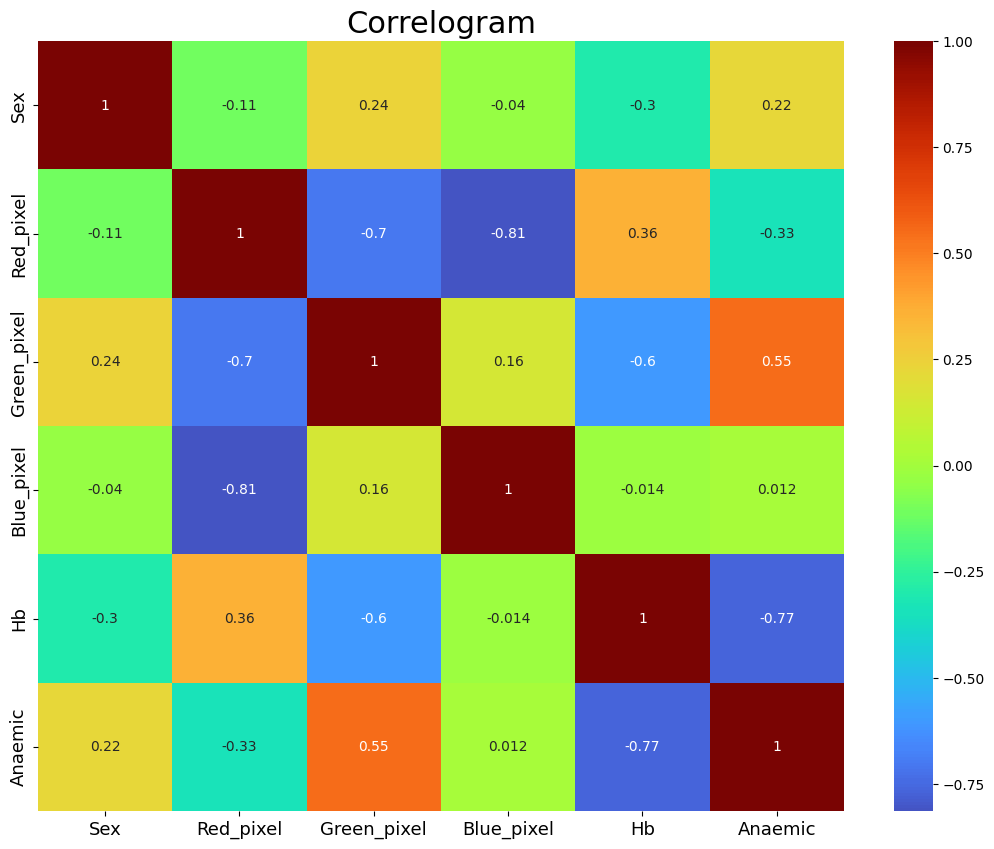

In [99]:
df.corr(numeric_only=True)

plt.figure(figsize=(13,10))

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap="turbo", center=0, annot=True)
plt.title('Correlogram', fontsize=22)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

Проверка датасета на перекос в данных

In [103]:
print(df["Anaemic"].value_counts())

Anaemic
0    76
1    25
Name: count, dtype: int64
